## What is Natural Language Processing (NPL) ?
Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

* In this kernel we will learn how we classify types of review. 
* Our steps are:
        ** Read Data
        ** PreProcess Data
        ** Stopwords
        ** Lemmatazation


In [1]:
## Import Libraries
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Read Data
data=pd.read_csv("googleplaystore_user_reviews.csv",encoding="latin1")

In [2]:
data.head() 

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
data=pd.concat([data.Translated_Review,data.Sentiment],axis=1)
data.dropna(axis=0,inplace=True)
data.tail()

,Translated_Review,Sentiment
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive
64230,"Useless app, I searched flats kondapur, Hydera...",Negative


Here is our data. We need to classify reviews according to Sentiment. So Translated_Review is our x column and Sentiment is our y column which we will predict.
* Now Lets learn our sentiments.

In [4]:
data.Sentiment.unique() 

array(['Positive', 'Neutral', 'Negative'], dtype=object)

We have 3 values:
* Posivitive (0)
* Negative  (1)
* Neutral     (2)
 
We can accept it like this. Lets convert these to our values.

Text(0.5, 1.0, 'Count of Sentiments')

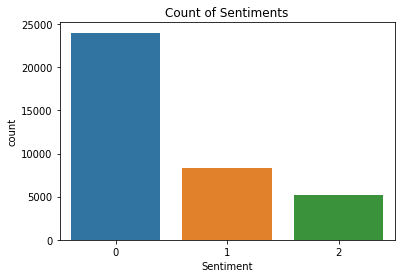

In [5]:
data.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in data.Sentiment]

#visualization
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.countplot(data.Sentiment)
plt.title("Count of Sentiments")

In [6]:
data.Sentiment.value_counts()

0    23998
1     8271
2     5158
Name: Sentiment, dtype: int64

#### Here our Preprocessing Side

** So we need to preprocess our data which means clean data for model.

** First we need to remove characters not letters.

For giving example let's work on only one sample. Then works for all.

In [7]:
import re ## Regular expression for deleting characters which are not letters.
first_sample = data.Translated_Review[9] 
sample = re.sub("[^a-zA-Z]"," ",first_sample)
sample = sample.lower()
print("[{}] convert to \n[{}]".format(data.Translated_Review[9],sample))

[It helpful site ! It help foods get !] convert to 
[it helpful site   it help foods get  ]


#### Now StopWords Turn

In [8]:
## import libraries

import nltk  ## Natural Language Tool Kit
from nltk.corpus import stopwords 

sample=nltk.word_tokenize(sample)
print(sample)

['it', 'helpful', 'site', 'it', 'help', 'foods', 'get']


Tokenize provides us split the sentence. Drop Unnecessary Words

In [9]:
sample = [word for word in sample if not word in set(stopwords.words("english"))]
print(sample)   ## drop unnecesarry words like it, I, you.

['helpful', 'site', 'help', 'foods', 'get']


#### - What is Lemmatazation
  With lemmatization we can convert words to stem. For example; Liked and Like. Is it important ?
    - Yes, because in your perspective "liked" and "like" seem same but for machine they both are different. We need to make easier it for machine.

In [10]:
lemma = nltk.WordNetLemmatizer()  
sample = [ lemma.lemmatize(word) for word in sample]
sample = " ".join(sample)
## for this example there is no paragoge I cant show you but if there is -ed or -s or something like these,
## lemmatizer will drop them and returns stem of word

### Lets apply it for all !

In [11]:
text_list=[]
for i in data.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [12]:
text_list[:5]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way']

#### We have bag words, clean and relevant words.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=1000
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" you can add but we have already applied it.
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names()
print("Most used 50 words: ",all_words[0:50])

Most used 50 words:  ['ability', 'able', 'about', 'absolutely', 'access', 'account', 'accurate', 'across', 'action', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'advert', 'advertisement', 'after', 'again', 'age', 'ago', 'alarm', 'alert', 'all', 'allow', 'allows', 'almost', 'along', 'alot', 'already', 'also', 'although', 'always', 'am', 'amazing', 'amazon', 'amount', 'an', 'and', 'android', 'anime', 'annoying', 'another', 'answer', 'any', 'anymore']


* Our data is ready for models. Its time to choose the best one!

#### Let's start with Naive Bayes

First we need to split our data to train and test

In [14]:
y = data.iloc[:,1].values
x= sparce_matrix

from sklearn.model_selection import train_test_split
from sklearn import metrics
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

score = []

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))
score.append(nb.score(xtest,ytest))

acc :  0.5903018968741651


#### Check Confusion Matrix

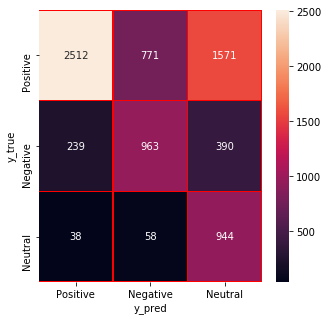

In [16]:
y_pred=nb.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

#### Random Forest ->

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))
score.append(rf.score(xtest,ytest))

acc:  0.8936681806037937


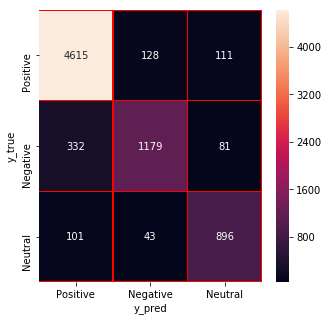

In [18]:
y_pred=rf.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
print("Logistic Regression accuracy: ",lr.score(xtest,ytest))
score.append(lr.score(xtest,ytest))

Logistic Regression accuracy:  0.9011488111140796


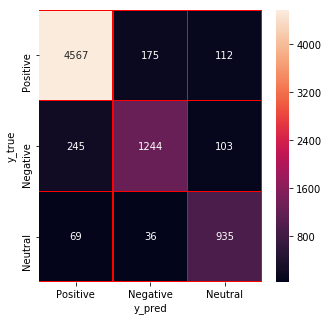

In [20]:
y_pred=lr.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### I do not recommend SVM and KNN for this nlp data set, because this is string data set and these algorithms render too slow, and unsuccessful.

In [21]:
approaches = ["Naive Bayes","Random Forest","Logistic Regression"]
scores_df = pd.DataFrame(list(zip(approaches,score)))
scores_df.set_index(0).transpose()

,Naive Bayes,Random Forest,Logistic Regression
1,0.590302,0.893668,0.901149


##### As you see, logistic regression is the best classifier for this basic nlp dataset with default hyperparameters.